# Bayesian Model Comparison

Bayesian model comparison arises when we cannot condition on which model generated our data, leaving this model choice uncertain, so we **quantify our uncertainty** about competing models by measuring how well they predict observed data while accounting for the uncertainty inherent in their parameter spaces reflected by how broadly their priors spread probability.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide28.png)

# Key Formula

When we cannot condition on which model $M_1$ or $M_2$ generated our data, we quantify our uncertainty about model choice by calculating **posterior odds**. These represent our updated uncertainty about competing models after observing the data:

$$ \frac{P(M_1|D)}{P(M_2|D)} = \frac{P(D|M_1)P(M_1)}{P(D|M_2)P(M_2)} $$

This can be decomposed as:

$$ \text{Posterior Odds} = \text{Bayes Factor} \times \text{Prior Odds} $$

Where:
- $P(M_1|D)$ and $P(M_2|D)$ are our **posterior uncertainties** about models $M_1$ and $M_2$ after conditioning on the observed data
- $\frac{P(D|M_1)}{P(D|M_2)}$ is the **Bayes factor**, which quantifies how the data updates our uncertainty about which model is more plausible
- $P(M_1)$ and $P(M_2)$ are our **prior uncertainties** about each model before conditioning on any data, representing what we cannot know a priori about model choice

# Technical Details

## Recall Bayes Factor

**Bayes factor** quantifies how the data updates our uncertainty about competing models when we cannot condition on which model generated the observations:

$$
\text{BF}_{21} = \frac{L(\text{M}_2|\text{D})}{L(\text{M}_1|\text{D})} ={\frac {\int \Pr(\theta_{2}|M_{2})\Pr(D|\theta_{2},M_{2})\,d\theta _{2}}{\int \Pr(\theta_{1}|M_{1})\Pr(D|\theta_{1},M_{1})\,d\theta _{1}}}
$$

**Interpreting uncertainty updates**: 
- $\text{BF}_{21} > 1$: Data reduces our uncertainty by favoring model $M_2$ over $M_1$
- $\text{BF}_{21} < 1$: Data reduces our uncertainty by favoring model $M_1$ over $M_2$
- $\text{BF}_{21} = 1$: Data provides no information to reduce our uncertainty between models

## From Uncertainty Quantification to Model Selection

Since we cannot condition on the true model a priori, the Bayes factor updates our prior uncertainty through:

$$
\frac{P(M_2|D)}{P(M_1|D)} = \text{BF}_{21} \times \frac{P(M_2)}{P(M_1)}
$$

This shows how conditioning on data transforms our uncertainty:

$$
\text{Posterior Uncertainty} = \text{Evidence Update} \times \text{Prior Uncertainty}
$$

## Quantifying Prior Model Uncertainty

**Equal uncertainty** (no initial preference): Set $P(M_1) = P(M_2) = 0.5$

$$
\frac{P(M_2|D)}{P(M_1|D)} = \text{BF}_{21}
$$
*Our posterior uncertainty is determined entirely by the data.*

**Unequal uncertainty** (one model initially preferred):

$$
\frac{P(M_2|D)}{P(M_1|D)} = \text{BF}_{21} \times \frac{P(M_2)}{P(M_1)}
$$
*The data updates our initial uncertainty about model choice.*

## Computing the Marginal Likelihood

The integral $\int \Pr(\theta|M)\Pr(D|\theta,M)\,d\theta$ represents the **marginal likelihood** - the probability of observing the data under a model when we cannot condition on specific parameter values and must average over all possibilities.

### Simple Case: When We Can Condition Analytically
When the prior and likelihood are conjugate (like the normal distributions in our Bayesian normal mean and multivariate normal mean models), we can analytically integrate out the parameter uncertainty, yielding closed-form marginal likelihoods.

### Complex Case: When Parameter Uncertainty Cannot Be Resolved Analytically

When priors and likelihoods are not conjugate, we may not be able to analytically resolve the parameter uncertainty in $\int \Pr(\theta|M)\Pr(D|\theta,M)\,d\theta$. This reflects the fundamental challenge: when we cannot condition on parameters, we must numerically integrate over all possible values, which becomes computationally prohibitive for high-dimensional parameter spaces in real GWAS datasets.

Several approximation methods have been developed to handle this uncertainty:
- **Laplace approximation** (assumes uncertainty is concentrated around the posterior mode)
- **MCMC-based methods** (e.g., Chib's method or thermodynamic integration, which samples from the uncertainty distribution)
- **Nested Sampling** (systematically explores the uncertainty landscape)

The choice reflects a trade-off between computational feasibility and how thoroughly we can characterize the parameter uncertainty in our model comparison.

# Related Topics

- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [odds ratio](https://statfungen.github.io/statgen-primer/odds_ratio.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)
- [linkage disequilibrium](https://statfungen.github.io/statgen-primer/linkage_disequilibrium.html)
- [marginal and joint effects](https://statfungen.github.io/statgen-primer/marginal_joint_effects.html)
- [Bayes factor](https://statfungen.github.io/statgen-primer/Bayes_factor.html)
- [Bayes rule](https://statfungen.github.io/statgen-primer/Bayes_rule.html)
- [Bayesian normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_normal_mean_model.html)
- [Bayesian multivariate normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_multivariate_normal_mean_model.html)
- [Bayesian mixture model](https://statfungen.github.io/statgen-primer/Bayesian_mixture_model.html)

# Example

## Example 1 -- Fine Mapping

Remember when we discussed marginal versus joint effects? We saw how correlated predictors create misleading associations, and our solution was simple: fit a joint model with all predictors. This approach treated effects as fixed parameters, assuming we could condition on everything simultaneously.

But this assumption is not realistic - we cannot condition on everything. In genomics, when you have hundreds of correlated variants in linkage disequilibrium (LD), we cannot condition on all joint effects because the models become unstable due to overfitting, forcing us to acknowledge our conditioning limitations.

This creates the classic **fine-mapping** problem - because we cannot condition on everything, we face fundamental uncertainty about which variant is truly causal. Variants in LD "travel together" through generations, leaving us uncertain about causality even though all variants show association.

Since we cannot condition on everything, we must treat causal variant identity as uncertain. Bayesian model comparison provides a principled framework for quantifying our uncertainty about different causal hypotheses, systematically evaluating which single variant is most likely causal while properly accounting for this inherent uncertainty arising from our conditioning limitations.

Let's define our competing models:

- **M0**: Null model - none of the variants are causal
- **M1**: Variant 1 is the causal variant  
- **M2**: Variant 2 is the causal variant
- **M3**: Variant 3 is the causal variant

### Generation of Simulated Data

In [1]:
# Clear the environment and set seed for reproducibility
rm(list = ls())
set.seed(9) 

# Parameters for our simulation
N <- 20  # Number of individuals
M <- 3   # Number of variants

# Generate correlated genotype data to simulate linkage disequilibrium
# We'll make Variant 1 the true causal variant

# Start with variant 1 (our true causal variant)
variant1 <- sample(0:2, N, replace = TRUE, prob = c(0.4, 0.4, 0.2))

# Create variants 2 and 3 in LD with variant 1
# Higher correlation = stronger LD
variant2 <- ifelse(runif(N) < 0.9, variant1, sample(0:2, N, replace = TRUE))
variant3 <- ifelse(runif(N) < 0.8, variant1, sample(0:2, N, replace = TRUE))

# Combine into genotype matrix
Xraw_additive <- cbind(variant1, variant2, variant3)
rownames(Xraw_additive) <- paste("Individual", 1:N)
colnames(Xraw_additive) <- paste("Variant", 1:M)

# Standardize genotypes (mean 0, variance 1)
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)

# Generate phenotype where ONLY Variant 1 has a true causal effect
true_beta1 <- 1.5  # Strong effect size for variant 1
epsilon <- rnorm(N, mean = 0, sd = 0.5)  # Random noise
Y_raw <- X[, 1] * true_beta1 + epsilon   # Only variant 1 affects the trait

# Standardize phenotype
Y <- scale(Y_raw)


Notice how we've created linkage disequilibrium - variants 2 and 3 are correlated with variant 1, but only variant 1 actually causes the phenotype.

### Setting Up Our Bayesian Framework

Now we need to define our statistical models. For each model, we'll assume:

- **Likelihood**: Normal distribution for the phenotype
- **Prior for effect size**: Normal distribution centered at 0
- **Prior for error variance**: Inverse-gamma distribution

In [2]:
# Bayesian model setup
# We'll use conjugate priors for computational convenience

# Prior parameters for effect sizes (beta)
beta_prior_mean <- 0
beta_prior_var <- 1

# Prior parameters for error variance (sigma^2)
# Using inverse-gamma: IG(alpha, beta)
sigma2_prior_alpha <- 2
sigma2_prior_beta <- 1


### Computing Marginal Likelihoods and Bayes Factors

The key to Bayesian model comparison is computing the marginal likelihood for each model. This tells us how well each model explains the data, accounting for uncertainty in the parameters.

In [3]:
# Function to compute marginal likelihood for each single-variant model
compute_marginal_likelihood <- function(X_variant, Y) {
  n <- length(Y)
  
  # Posterior parameters (using conjugate normal-inverse-gamma)
  V_n <- 1 / (1/beta_prior_var + sum(X_variant^2))
  mu_n <- V_n * (beta_prior_mean/beta_prior_var + sum(X_variant * Y))
  
  alpha_n <- sigma2_prior_alpha + n/2
  beta_n <- sigma2_prior_beta + 0.5 * (sum(Y^2) + 
                                       beta_prior_mean^2/beta_prior_var - 
                                       mu_n^2/V_n)
  
  # Marginal likelihood calculation
  log_ml <- -n/2 * log(2*pi) + 
            0.5 * log(V_n/beta_prior_var) +
            sigma2_prior_alpha * log(sigma2_prior_beta) - 
            alpha_n * log(beta_n) +
            lgamma(alpha_n) - lgamma(sigma2_prior_alpha)
  
  return(log_ml)
}

# Compute marginal likelihoods for each model
log_ml_M0 <- compute_marginal_likelihood(rep(0, N), Y)  # Null model
log_ml_M1 <- compute_marginal_likelihood(X[,1], Y)     # Variant 1 causal
log_ml_M2 <- compute_marginal_likelihood(X[,2], Y)     # Variant 2 causal  
log_ml_M3 <- compute_marginal_likelihood(X[,3], Y)     # Variant 3 causal

log_marginal_likelihoods <- c(log_ml_M0, log_ml_M1, log_ml_M2, log_ml_M3)
names(log_marginal_likelihoods) <- c("M0 (Null)", "M1 (Var1)", "M2 (Var2)", "M3 (Var3)")

Now we can compute Bayes factors to compare models. Remember: BF > 1 means the numerator model is preferred.

In [4]:
# Compute Bayes factors relative to the null model
BF_M1_vs_M0 <- exp(log_ml_M1 - log_ml_M0)
BF_M2_vs_M0 <- exp(log_ml_M2 - log_ml_M0)
BF_M3_vs_M0 <- exp(log_ml_M3 - log_ml_M0)

# Compute Bayes factors between variant models
BF_M1_vs_M2 <- exp(log_ml_M1 - log_ml_M2)
BF_M1_vs_M3 <- exp(log_ml_M1 - log_ml_M3)
BF_M2_vs_M3 <- exp(log_ml_M2 - log_ml_M3)

print("Bayes Factors (evidence in favor of first model):")
print(paste("M1 vs M0 (Null):", round(BF_M1_vs_M0, 2)))
print(paste("M2 vs M0 (Null):", round(BF_M2_vs_M0, 2)))
print(paste("M3 vs M0 (Null):", round(BF_M3_vs_M0, 2)))
print("")
print("Comparing variant models:")
print(paste("M1 vs M2:", round(BF_M1_vs_M2, 2)))
print(paste("M1 vs M3:", round(BF_M1_vs_M3, 2)))
print(paste("M2 vs M3:", round(BF_M2_vs_M3, 2)))

[1] "Bayes Factors (evidence in favor of first model):"
[1] "M1 vs M0 (Null): 6783402.04"
[1] "M2 vs M0 (Null): 4.06"
[1] "M3 vs M0 (Null): 7763.49"
[1] ""
[1] "Comparing variant models:"
[1] "M1 vs M2: 1671050.19"
[1] "M1 vs M3: 873.76"
[1] "M2 vs M3: 0"


### Computing Posterior Model Probabilities

Finally, let's compute the posterior probability for each model. This tells us how confident we should be in each explanation.


In [5]:
# Assume equal prior probabilities for all models
prior_probs <- rep(0.25, 4)  # Equal priors for M0, M1, M2, M3

# Compute posterior probabilities
# First, convert log marginal likelihoods to regular scale (avoiding overflow)
max_log_ml <- max(log_marginal_likelihoods)
scaled_ml <- exp(log_marginal_likelihoods - max_log_ml)

# Compute posterior probabilities
unnormalized_posterior <- prior_probs * scaled_ml
posterior_probs <- unnormalized_posterior / sum(unnormalized_posterior)

names(posterior_probs) <- c("M0 (Null)", "M1 (Var1)", "M2 (Var2)", "M3 (Var3)")

print("Posterior Model Probabilities:")
for(i in 1:4) {
  print(paste(names(posterior_probs)[i], ":", round(posterior_probs[i], 4)))
}

# Find the most probable model
best_model <- names(posterior_probs)[which.max(posterior_probs)]
print(paste("Most probable model:", best_model))
print(paste("Posterior probability:", round(max(posterior_probs), 4)))

[1] "Posterior Model Probabilities:"
[1] "M0 (Null) : 0"
[1] "M1 (Var1) : 0.9989"
[1] "M2 (Var2) : 0"
[1] "M3 (Var3) : 0.0011"
[1] "Most probable model: M1 (Var1)"
[1] "Posterior probability: 0.9989"


In this example, we demonstrated how Bayesian model comparison can solve the fine-mapping problem. Even when variants are in linkage disequilibrium and all show association with the phenotype, our method was able to identify the true causal variant by:

1. **Comparing multiple models** rather than just testing individual associations
2. **Accounting for uncertainty** in our parameter estimates
3. **Using proper statistical principles** to weigh evidence for different explanations

The key insight is that the Bayes factor naturally accounts for model complexity - a model needs to provide substantially better fit to the data to overcome the "penalty" for additional parameters. This helps us distinguish between true causation and mere correlation due to LD.

This approach forms the foundation for more sophisticated fine-mapping methods used in modern genomics research.

## Example 2 -- Detecting pleiotropy


Recall our [Lecture: Bayesian multivariate normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_multivariate_normal_mean_model.html) example where we studied the scenario that one genetic variant could affect two traits (height and weight). 

In practice, there could be multiple options for the behavior of this variant on the two traits:

- **M0 (Null)**: "This variant does nothing" - $\boldsymbol{\beta}$ = (0, 0)
- **M1 (Height Only)**: "This variant only affects height" - $\boldsymbol{\beta}$ = ($\beta_1$, 0)  
- **M2 (Weight Only)**: "This variant only affects weight" - $\boldsymbol{\beta}$ = (0, $\beta_2$)
- **M3 (Perfect Correlation)**: "Effects are perfectly correlated" - $\beta_2$ = $\beta_1$
- **M4 (Weak Correlation)**: "Effects are weakly related" - correlation = 0.1
- **M5 (Medium Correlation)**: "Effects are moderately related" - correlation = 0.5
- **M6 (Strong Correlation)**: "Effects are strongly related" - correlation = 0.8

The true effect may come from one of the models above (or maybe some other models), but let's use the Bayesian model comparison to detect which one is the most likely, conditioning on the data that we observe. 

This is where Bayesian model comparison becomes powerful - it allows us to quantify our uncertainty when we cannot condition on the true biological model.

**Our Approach**: We'll use Bayesian model comparison to quantify our uncertainty about these competing biological explanations, computing marginal likelihoods $P(\text{D}|\text{M})$ for each mixture model by integrating over all possible parameter values when we cannot condition on their true values.

### Generate Data from a True Model

Let's simulate data where we know the truth - the variant has a medium correlation effect (M5).

In [6]:
rm(list=ls())
library(MASS)  # for mvrnorm
library(mvtnorm)
set.seed(28)

In [7]:
# Data Generation for Bayesian Model Comparison
# One variant affecting two traits (height and weight) with correlated effects

# Parameters
N <- 100  # sample size
true_correlation <- 0.5  # correlation between effects on height and weight
effect_variance <- 0.25  # variance for each effect

# Step 1: Generate effect sizes from multivariate normal distribution
# Covariance matrix for effects with correlation = 0.5
Sigma_effects <- matrix(c(effect_variance, true_correlation * effect_variance,
                         true_correlation * effect_variance, effect_variance), 2, 2)

# Draw the true effects from multivariate normal
beta_true <- mvrnorm(1, mu = c(2, 3), Sigma = Sigma_effects)
true_beta_height <- beta_true[1]  # effect on height
true_beta_weight <- beta_true[2]  # effect on weight

cat("Generated effect sizes:\n")
cat("Effect on height (beta1):", round(true_beta_height, 3), "\n")
cat("Effect on weight (beta2):", round(true_beta_weight, 3), "\n")

# Step 2: Generate genotype data
# Genotype coding: 0, 1, 2 copies of effect allele
minor_allele_freq <- 0.3
genotypes <- rbinom(N, 2, minor_allele_freq)

# Step 3: Generate phenotype data
# Residual variance-covariance matrix (environmental effects)
Sigma_residual <- matrix(c(1.0, 0.2,   # height variance = 1.0, covariance = 0.2
                          0.2, 0.8), 2, 2)  # weight variance = 0.8

# Generate residual errors
residual_errors <- mvrnorm(N, mu = c(0, 0), Sigma = Sigma_residual)

# Generate phenotypes: Y = genetic effect + residual error
# Height and weight with baseline means
baseline_height <- 170  # cm
baseline_weight <- 70   # kg

height <- baseline_height + genotypes * true_beta_height + residual_errors[, 1]
weight <- baseline_weight + genotypes * true_beta_weight + residual_errors[, 2]

# Combine phenotypes
phenotypes <- cbind(height, weight)
phenotypes_scaled <- scale(phenotypes, scale = FALSE)
colnames(phenotypes_scaled) <- colnames(phenotypes) <- c("Height", "Weight")

Generated effect sizes:
Effect on height (beta1): 1.192 
Effect on weight (beta2): 2.16 


### Bayesian Model Comparison Setup

We'll define all possible models as prior covariance matrices for the effect sizes.

In [8]:
# Define covariance matrices for each model
models <- list(
  M0 = matrix(c(0, 0, 0, 0), 2, 2),                    # Null: beta = (0, 0)
  M1 = matrix(c(effect_variance, 0, 0, 0), 2, 2),      # Height only
  M2 = matrix(c(0, 0, 0, effect_variance), 2, 2),      # Weight only
  M3 = matrix(c(effect_variance, effect_variance,       # Perfect correlation
               effect_variance, effect_variance), 2, 2),
  M4 = matrix(c(effect_variance, 0.1 * effect_variance, # Weak correlation (0.1)
               0.1 * effect_variance, effect_variance), 2, 2),
  M5 = matrix(c(effect_variance, 0.5 * effect_variance, # Medium correlation (0.5)
               0.5 * effect_variance, effect_variance), 2, 2),
  M6 = matrix(c(effect_variance, 0.8 * effect_variance, # Strong correlation (0.8)
               0.8 * effect_variance, effect_variance), 2, 2)
)

# Equal prior probabilities for all models
prior_weights <- rep(1/7, 7)
names(prior_weights) <- names(models)

cat("\nPrior weights (equal for all models):", round(prior_weights, 3), "\n")


Prior weights (equal for all models): 0.143 0.143 0.143 0.143 0.143 0.143 0.143 


### Marginal Likelihood Calculation

When we cannot condition on the true parameter values, we must integrate over all possibilities to compute marginal likelihoods. This integration captures our uncertainty about parameters within each model.


In [9]:
# Function to compute log-likelihood when we condition on specific beta values
log_likelihood_variant <- function(beta, genotypes_variant, phenotypes, residual_cov) {
  N <- nrow(phenotypes)
  ll <- 0
  baseline <- c(0, 0)  # Centered phenotypes (subtract population means)
  
  for (i in 1:N) {
    pred <- baseline + genotypes_variant[i] * beta
    diff <- phenotypes[i, ] - pred
    ll <- ll - 0.5 * t(diff) %*% solve(residual_cov) %*% diff - 
          0.5 * log(det(2 * pi * residual_cov))
  }
  return(as.numeric(ll))
}

# Function to compute prior probability when we condition on specific beta values
log_prior <- function(beta, component_cov_matrix) {
  if (all(component_cov_matrix == 0)) {
    # For null model: prior probability is 1 if beta = (0,0), 0 otherwise
    return(ifelse(all(abs(beta) < 0.01), 0, -Inf))
  }
  
  # Add small regularization for numerical stability
  cov_matrix <- component_cov_matrix + diag(1e-6, 2)
  lp <- -0.5 * t(beta) %*% solve(cov_matrix) %*% beta - 
        0.5 * log(det(2 * pi * cov_matrix))
  return(as.numeric(lp))
}

# Function to compute marginal likelihood for each model
compute_marginal_likelihood <- function(model_name, genotypes_variant, phenotypes_variant, residual_cov) {
  component_cov <- models[[model_name]]
  
  if (model_name == "M0") {
    # Null model: we can condition on beta = (0, 0)
    beta <- c(0, 0)
    ll <- log_likelihood_variant(beta, genotypes_variant, phenotypes_variant, residual_cov)
    lp <- log_prior(beta, component_cov)
    return(ll + lp)
  }
  
  # For non-null models: cannot condition on beta, so we integrate
  # This integration reflects our uncertainty about parameter values
  beta_range <- seq(-1.5, 1.5, length.out = 50)  # Integration grid
  grid <- expand.grid(beta_height = beta_range, beta_weight = beta_range)
  
  log_integrand_values <- numeric(nrow(grid))
  
  for (i in 1:nrow(grid)) {
    beta <- c(grid$beta_height[i], grid$beta_weight[i])
    ll <- log_likelihood_variant(beta, genotypes_variant, phenotypes_variant, residual_cov)
    lp <- log_prior(beta, component_cov)
    log_integrand_values[i] <- ll + lp
  }
  
  # Numerical integration using log-sum-exp for stability
  max_log <- max(log_integrand_values[is.finite(log_integrand_values)])
  if (!is.finite(max_log)) return(-Inf)
  
  log_marginal <- max_log + log(sum(exp(log_integrand_values - max_log), na.rm = TRUE))
  grid_spacing <- (beta_range[2] - beta_range[1])^2
  return(log_marginal + log(grid_spacing))
}

### Bayesian Model Comparison


In [10]:
# Calculate marginal likelihood for each model
log_marginal_likelihoods <- numeric(7)
names(log_marginal_likelihoods) <- names(models)

for (i in 1:7) {
  model_name <- names(models)[i]
  log_marginal_likelihoods[i] <- compute_marginal_likelihood(
    model_name, genotypes, phenotypes_scaled, Sigma_residual
  )
}


### Posterior Probabilities and Results


In [11]:
# Calculate posterior probabilities using Bayes' theorem
# Posterior is in proportion to Likelihood * Prior
log_posterior_unnorm <- log_marginal_likelihoods + log(prior_weights)

# Normalize to get proper probabilities (using log-sum-exp for numerical stability)
max_log_post <- max(log_posterior_unnorm)
posterior_probs <- exp(log_posterior_unnorm - max_log_post)
posterior_probs <- posterior_probs / sum(posterior_probs)

# Calculate Bayes factors (relative to M0)
log_bayes_factors <- log_marginal_likelihoods - log_marginal_likelihoods["M0"]
bayes_factors <- exp(log_bayes_factors)

# Create results summary
results_df <- data.frame(
  Model = names(models),
  Log_Marginal_Likelihood = round(log_marginal_likelihoods, 3),
  Prior_Probability = round(prior_weights, 4),
  Posterior_Probability = round(posterior_probs, 4),
  Bayes_Factor_vs_M0 = round(bayes_factors, 2),
  stringsAsFactors = FALSE
)

The Bayesian results for M0 to M6 are:

In [12]:
results_df

,Model,Log_Marginal_Likelihood,Prior_Probability,Posterior_Probability,Bayes_Factor_vs_M0
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
M0,M0,-416.572,0.1429,0.0000,1.000000e+00
M1,M1,-874.699,0.1429,0.0000,0.000000e+00
M2,M2,-819.736,0.1429,0.0000,0.000000e+00
M3,M3,-344.314,0.1429,0.0059,2.405518e+31
M4,M4,-340.764,0.1429,0.2043,8.369311e+32
M5,M5,-340.047,0.1429,0.4187,1.715549e+33
M6,M6,-340.167,0.1429,0.3711,1.520367e+33


In [13]:
# Find the winning model
winner_idx <- which.max(posterior_probs)
winner_name <- names(models)[winner_idx]
winner_prob <- posterior_probs[winner_idx]

cat("\nMost supported model:", winner_name, "\n")
cat("Posterior probability:", round(winner_prob, 4), "\n")
cat("Bayes factor vs M0:", round(bayes_factors[winner_idx], 2), "\n\n")


Most supported model: M5 
Posterior probability: 0.4187 
Bayes factor vs M0: 1.715549e+33 



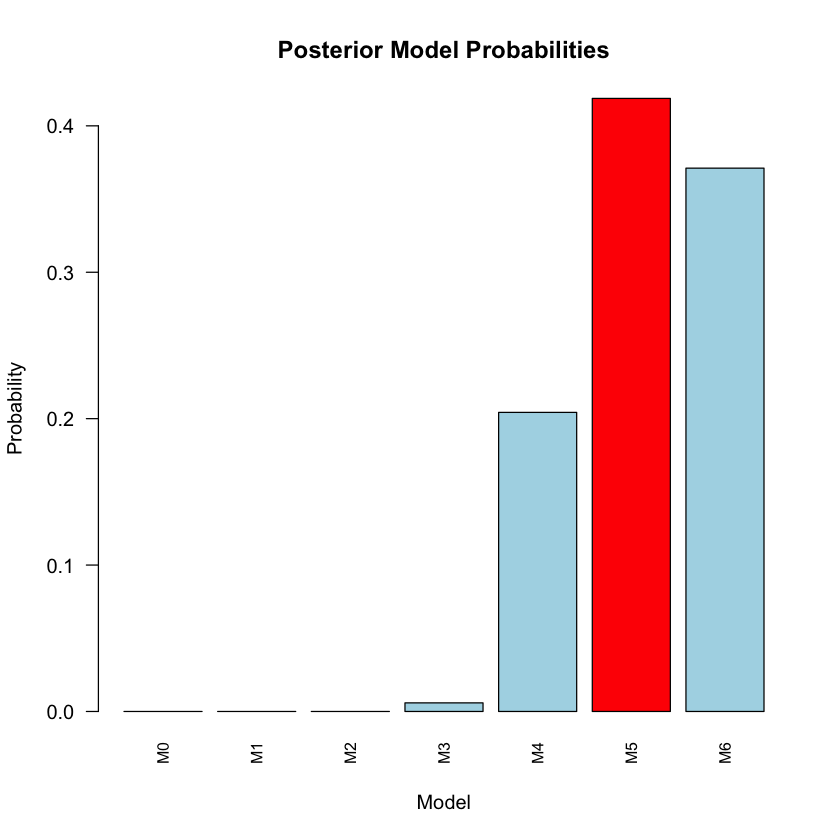

In [14]:
# Plot: Posterior probabilities
barplot(posterior_probs, names.arg = names(models), 
        main = "Posterior Model Probabilities",
        ylab = "Probability", xlab = "Model",
        col = ifelse(names(models) == winner_name, "red", "lightblue"),
        las = 2, cex.names = 0.8)


# Supplementary

## Graphical Summary

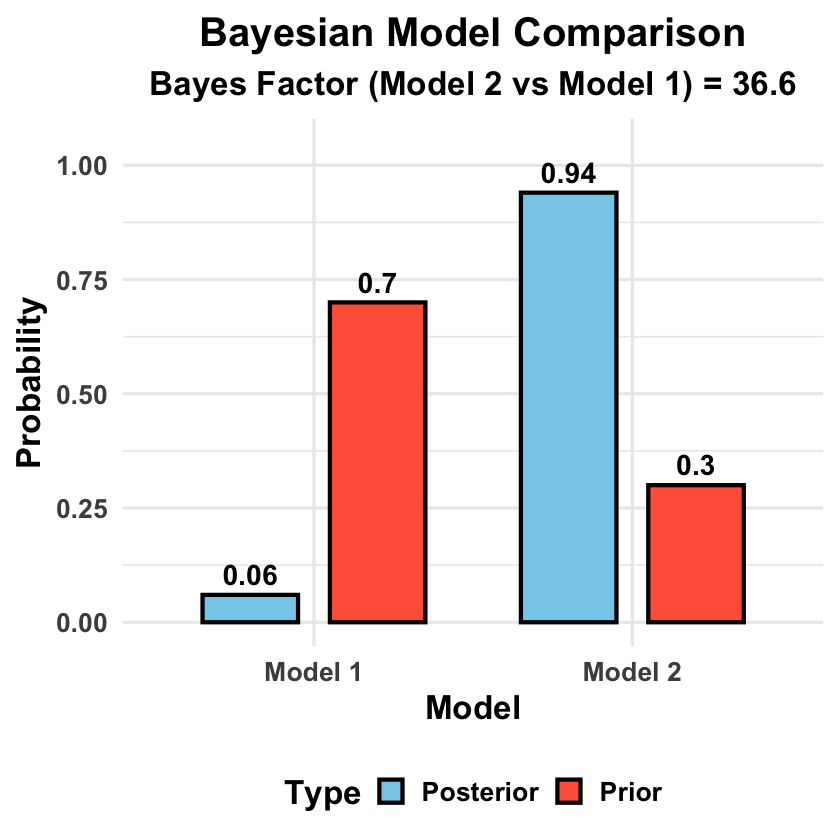

In [68]:
library(ggplot2)

# Basic model comparison data with unequal priors
model_data <- data.frame(
 Model = c("Model 1", "Model 2"),
 Log_Marginal_Likelihood = c(-152.3, -148.7),
 Prior_Probability = c(0.7, 0.3)  # Higher prior for Model 1
)

# Compute Bayes factor and posterior probabilities
bayes_factor <- exp(model_data$Log_Marginal_Likelihood[2] - model_data$Log_Marginal_Likelihood[1])
unnormalized_posteriors <- exp(model_data$Log_Marginal_Likelihood) * model_data$Prior_Probability
posterior_probs <- unnormalized_posteriors / sum(unnormalized_posteriors)

# Create plotting data
plot_data <- data.frame(
 Model = rep(c("Model 1", "Model 2"), 2),
 Probability = c(model_data$Prior_Probability, posterior_probs),
 Type = rep(c("Prior", "Posterior"), each = 2)
)

# Create barplot
p <- ggplot(plot_data, aes(x = Model, y = Probability, fill = Type)) +
 geom_col(position = position_dodge(width = 0.8), width = 0.6, color = "black", linewidth = 1.2) +
 geom_text(aes(label = round(Probability, 3)), 
           position = position_dodge(width = 0.8), vjust = -0.5, size = 6, fontface = "bold") +
 scale_fill_manual(values = c("Prior" = "tomato", "Posterior" = "skyblue")) +
 labs(
   title = "Bayesian Model Comparison",
   subtitle = paste("Bayes Factor (Model 2 vs Model 1) =", round(bayes_factor, 2)),
   y = "Probability",
   x = "Model",
   fill = "Type"
 ) +
 ylim(0, 1.05) +
 theme_minimal(base_size = 20) +
 theme(
   plot.title = element_text(hjust = 0.5, face = "bold"),
   plot.subtitle = element_text(hjust = 0.5, face = "bold"),
   axis.title.y = element_text(face = "bold"),
   axis.title.x = element_text(face = "bold"),
   axis.text.x = element_text(face = "bold"),
   axis.text.y = element_text(face = "bold"),
   legend.title = element_text(face = "bold"),
   legend.text = element_text(face = "bold"),
   legend.position = "bottom"
 )

print(p)

# Save the plot
ggsave("./cartoons/Bayesian_model_comparison.png", plot = p,
      width = 10, height = 6, 
      bg = "transparent",
      dpi = 300)